In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**We demonstrate the k-means clustering using libraries provided by Python and on the basis of a given iris dataset (irises are flowers)**

In [2]:
# import iris dataset - contains three species of irises
iris = pd.read_csv('iris.csv', index_col="number").dropna(axis=0)
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
number,,,,,
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
# print unique species for later checks
unique = iris['Species'].unique()

print(unique)

['setosa' 'versicolor' 'virginica']


In [4]:
# make it an unsupervised dataset - drop species label

X = iris.drop("Species", axis=1)
X.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
number,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


Question: How to group the Datapoints? Which k?<br>

Different approaches are commonly applied, e. g. expert knowledge. But in this case we plot a loss function for different number of clusters and select a fitting number of clusters.

In [5]:
from sklearn.cluster import KMeans

In [6]:
# standardize the data values into a standard format
# standard score z of each sample x: z = (x-u)/s where u is the mean and s is the standard deviation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [7]:
# number of clusters
k_max = 20 

# arrays storing every cluster and its belonging loss
clusters = []
losses = []

# fill the arrays using k-means
for k in range(k_max):
    model = KMeans(n_clusters=k+1)
    model.fit(X_scaled)
    clusters.append(k+1)
    losses.append(model.inertia_)

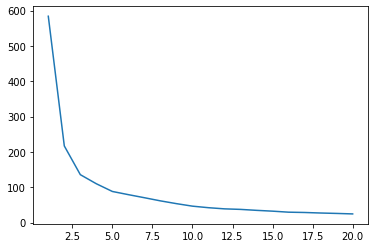

In [8]:
# plotting the loss-function
plt.plot(clusters, losses)
plt.show()

(0.0, 10.0)

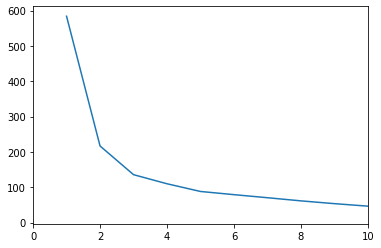

In [9]:
# zoom into the good region by limiting the x-axis
plt.plot(clusters, losses)
plt.xlim([0,10])

**Good region for amount of clusters is between two and five - let's start with two:**

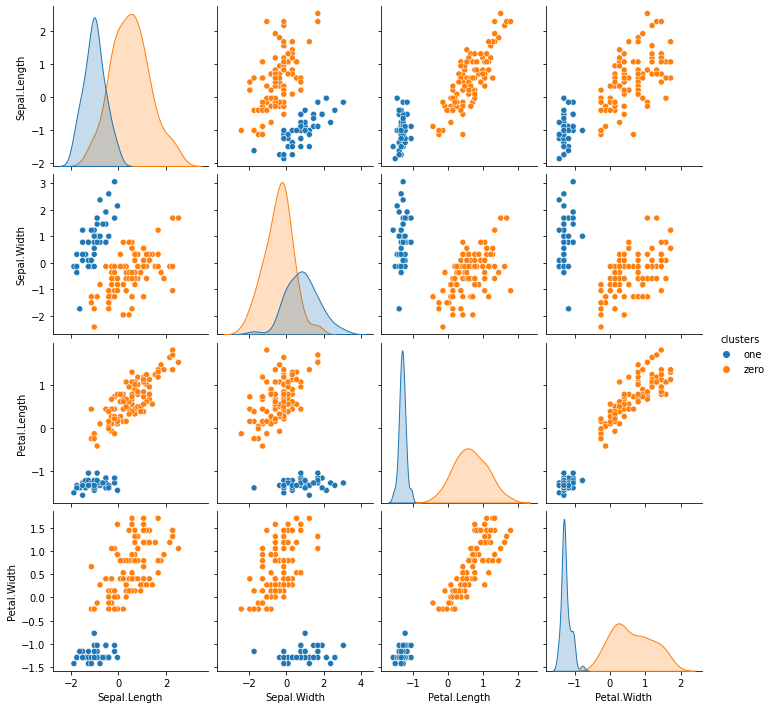

In [10]:
# refit algorithm
two_means = KMeans(n_clusters=2)
two_means.fit(X_scaled)

# match records to clusters by calling predict
two_means.predict(X_scaled)

# Preparation for plotting: create a df out of array
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
#X_scaled_df.head()

iris_scaled = X_scaled_df

numbers = ["zero", "one", "two", "three","four","five"]
iris_scaled["clusters"] = two_means.predict(X_scaled)
iris_scaled["clusters"] = iris_scaled["clusters"].apply(lambda x: numbers[x])
sns.pairplot(data=iris_scaled, hue="clusters")

**Now for the correct number of clusters - three:**

In [11]:
three_means = KMeans(n_clusters=3)
three_means.fit(X_scaled)
three_arr = three_means.predict(X_scaled)

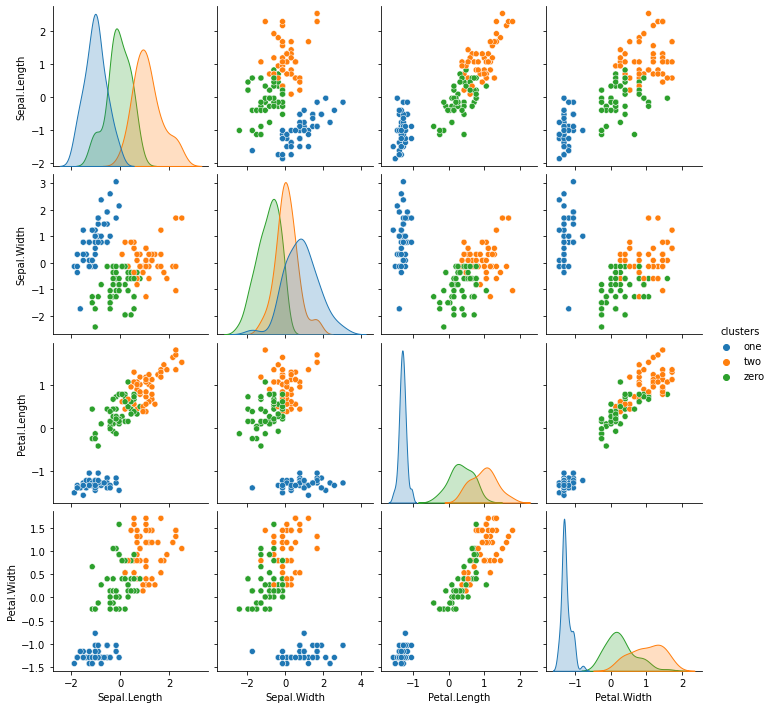

In [12]:
iris_scaled["clusters"] = three_means.predict(X_scaled)
iris_scaled["clusters"] = iris_scaled["clusters"].apply(lambda x: numbers[x])
sns.pairplot(data=iris_scaled, hue="clusters")

**Finally let's try five clusters:**

In [13]:
five_means = KMeans(n_clusters=5)
five_means.fit(X_scaled)
five_arr = five_means.predict(X_scaled)

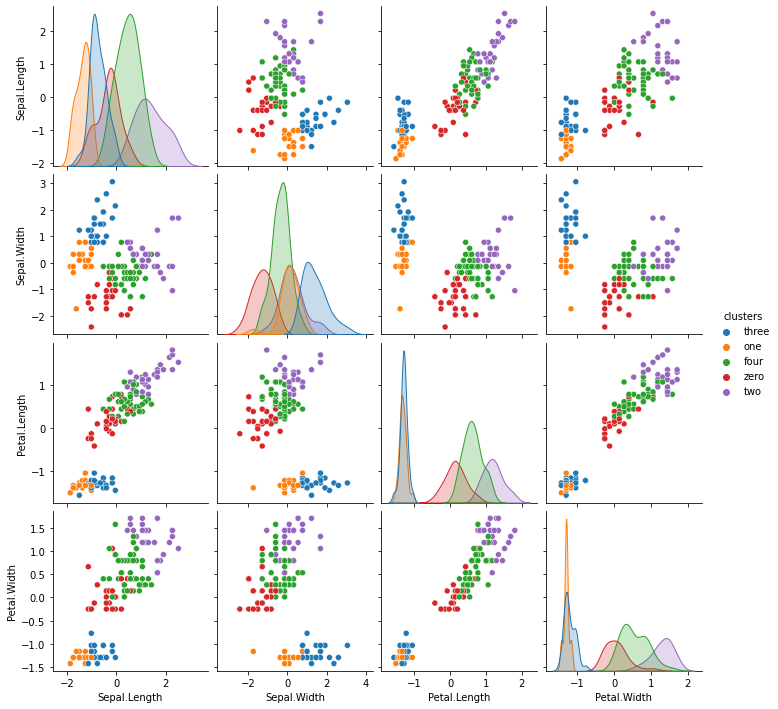

In [14]:
iris_scaled["clusters"] = five_means.predict(X_scaled)
iris_scaled["clusters"] = iris_scaled["clusters"].apply(lambda x: numbers[x])
sns.pairplot(data=iris_scaled, hue="clusters")

**But back to the classification of three clusters - let's check the result:**

In [15]:
# create new column 'classification' in iris df

iris["classification"] = three_arr

setosa = iris['classification'].iloc[0]
#print(setosa)

versicolor = iris['classification'].iloc[-1]
#print(versicolor)

virginica = iris['classification'].iloc[-2]
#print(virginica)

iris['classification'].mask(iris['classification'] == setosa, 'setosa', inplace=True)
iris['classification'].mask(iris['classification'] == virginica, 'virginica', inplace=True)
iris['classification'].mask(iris['classification'] == versicolor, 'versicolor', inplace=True)
pd.set_option('display.max_rows', None)

iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,classification
number,,,,,,
1,5.1,3.5,1.4,0.2,setosa,setosa
2,4.9,3.0,1.4,0.2,setosa,setosa
3,4.7,3.2,1.3,0.2,setosa,setosa
4,4.6,3.1,1.5,0.2,setosa,setosa
5,5.0,3.6,1.4,0.2,setosa,setosa
6,5.4,3.9,1.7,0.4,setosa,setosa
7,4.6,3.4,1.4,0.3,setosa,setosa
8,5.0,3.4,1.5,0.2,setosa,setosa
9,4.4,2.9,1.4,0.2,setosa,setosa


In [16]:
# ratio of correct classifications

right = 0

for i in range(0, len(iris)):
    if iris.iloc[i, iris.columns.get_loc('Species')] == iris.iloc[i, iris.columns.get_loc('classification')]:
        right += 1

print('length of the dataset: ' + str(len(iris)))

print('total amount of correct classifications: ' + str(right))
                              
print('ratio of correct classifications: ' + str((right/len(iris)*100)) + ' %')

length of the dataset: 146
total amount of correct classifications: 121
ratio of correct classifications: 82.87671232876713 %
